# 타이타닉 데이터 EDA

 > - targer => Survived (1:생존, 0:분류)-> 분류문제
 > - 타이타닉 탑승객의 생존률에 영향을 끼치는 요소가 무엇인가.
 > - 나이, 성별, 객실등급 등을 생존유무와 비교해 상관관계를 파악해보자.



#### 예측

> - 여성의 생존률이 남성의 생존률보다 높을것이다.
> - 성인보다 미성년자의 생존률이 더 높을 것이다.
> - 객실등급이 높을 수록 생존률이 높을것이다.
> - 객실의 위치와 생존률
> - 사회적 지위와 생존률

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

In [1]:
# repect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> - 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/프로젝트오리엔테이션_0426/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


> - 세부적인 분석에 앞서 데이터를 전반적으로 살펴보자.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


> - 1309개의 샘플(승객개인)
> - age, fare, cabin, embarked, boat, body, home.dest에서 결측치가 보인다.


> - body, home.dest는 결츠치가 다수이고 생존률과 큰 관계가 없어 보이므로 데이터에서 제외시킨다. canbin도 관측해보고 싶었지만 결측치가 너무많아 제대로된 분석이 힘들어 보임.

In [4]:
df.pop('body')
df.pop('cabin')
df.pop('home.dest')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN


## 성별과 생존률의 상관관계

> - 전체 생존률, 남성 생존률, 여성 생존률
> - 그래프로 비교

전체 승객을 성별로 구분짓고, 성별에 따른 생존률을 그래프를 통해 한눈에 확인해보자.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


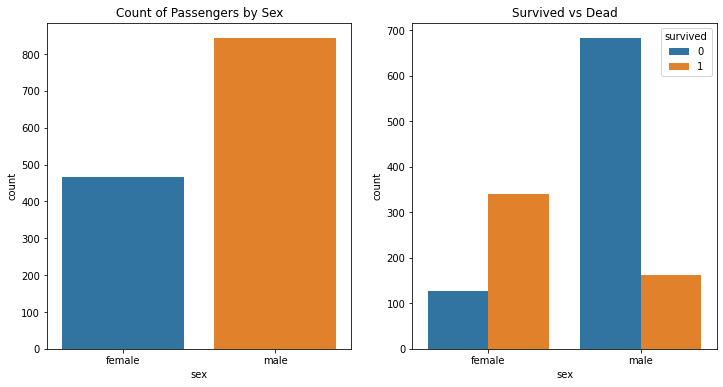

In [5]:
fig = plt.figure(figsize=(12, 6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex', data=df, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex', hue='survived', data=df, ax=graph2)
graph2.set_title('Survived vs Dead')

plt.show()

그래프를 통해 확인 할 수 있듯 여성은 사망자보다 생존자가 많고, 남성은 사망자가 훨씬 많다. 생존률을 구체적인 수치로 계산해보자.

In [6]:
total_sur_mean = df['survived'].mean()
male_sur_mean = df[df['sex'] == 'male']['survived'].mean()
female_sur_mean = df[df['sex'] == 'female']['survived'].mean()
male_sur_sum = df[df['sex'] == 'male']['survived'].sum()
female_sur_sum = df[df['sex'] == 'female']['survived'].sum()


print(f'남성 생존자: {male_sur_sum}명')
print(f'여성 생존자: {female_sur_sum}명')
print(f'전체 생존률: {total_sur_mean}')
print(f'남성 생존률: {male_sur_mean}')
print(f'여성 생존률: {female_sur_mean}')

남성 생존자: 161명
여성 생존자: 339명
전체 생존률: 0.3819709702062643
남성 생존률: 0.19098457888493475
여성 생존률: 0.7274678111587983


결과
> - 전체 승객의 생존률이 38%정도 되는데 여성의 생존률은 72%, 남성의 생존률은 19%이다. 즉, 남성보다 여성의 생존률이 훨씬 큰 것을 알 수 있고 생존자수도 여성이 남성보다 2배이상 많은것을 알 수 잇다.

## 나이와 생존의 상관관계

In [7]:

df['age'].isnull().sum()
age_df = df[df['age'].isnull() == False]['age']
age_df

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
        ...  
1301    45.50
1304    14.50
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1046, dtype: float64

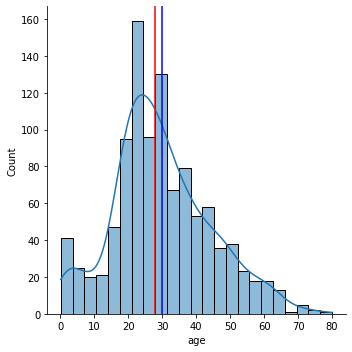

In [8]:
mean_age = np.mean(age_df)
median_age = np.median(age_df.sort_values())

sns.displot(age_df, kde=True)

plt.axvline(mean_age, color='blue')
plt.axvline(median_age, color='red')

age에서 (263)결측치가 확인 됨으로 해당 결측치는 age의 평균값으로 전처리하고 관측을 시작하자. -> 전체 데이터에서의 결측치 비율이 크지않고 그래프에서 알 수 있듯 전체적으로 표준정규분포를 따른다. 또한 평균과 중앙값간의 차가 크지 않으므로 결측치를 평균값으로 채워주자.

In [9]:
df['age'] = df['age'].fillna(df['age'].mean()) # 결측치 채우기

In [10]:
df['age']

0       29.000000
1        0.920000
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881138
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

> - 그래프를 통해 나이, 생존의 상관관계를 알아보자. -> 나이가 실수로 표현되어 있으므로 좀더 직관적인 관측을 위해 나이를 범주형 데이터로 변환 후 그래프로 표현해 보자.

In [11]:
df['age_cut'] = pd.cut(df['age'], bins=[0,10,20,50,100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


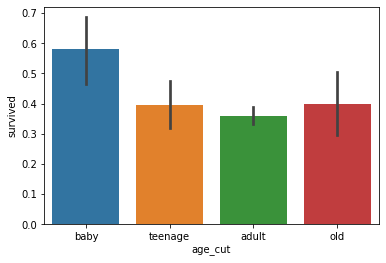

In [12]:
sns.barplot('age_cut', 'survived', data=df)

결과 : 그래프에서 확인 할 수 있듯이 중간나이대 보다 고령층, 어린이들의 생존률이 높음을 확인할 수 있다.



## 좀 다른 요소들을 확인해보자

## 호칭에 따른 데이터 분류 및 의미 파악, 생존률과의 상관관계


In [13]:
df_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/프로젝트오리엔테이션_0426/titanic.csv')
df_2.info()

## 다시한번 데이터를 불러와 새로운 변수에 지정해주자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [14]:
df_2['name'] # 이름이 적혀있는 형식이 동일하다. 리스트 형태로 만든다음 중간값을 뽑아내면 각 사람에 해당하는 칭호가 나올거 같다.

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

> - 이름의 중앙부분에 Miss, Master와 같이 각 사람별로 칭호가 부여되어 있다.
> - 각 칭호가 갖는 의미를 파악해 보고 더 나아가 그와 생존률이 연관되어 있는지 확인해보자.

In [15]:
def middle_nm(x):
    return x.split(', ')[1].split('.')[0]


df_2['호칭'] = df_2['name'].map(middle_nm) # map method를 이용해 name column의 요소를[',', '.']을 기준으로 분리하고 그 값을 데이터 프래임의 마지막단에 '호칭'이라는 새로운 column에 부여하였다.

In [20]:
df_2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [21]:
df_2['호칭'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: 호칭, dtype: int64

> - '호칭'에 'value_counts()'를 적용해 종류를 파악해 보면 4가지 호칭이 주를 이루는것을 확인할 수 있고 나머지는 특수한 직종이나, 선원이라고 예측된다. 
> - 따라서, 거의 모든 승객이 Mr, Miss, Mrs, Master의 칭호로 분류된다는것을 알 수 있다. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52845 missing from current font.
  font.set_text(s, 0, flags=flags)

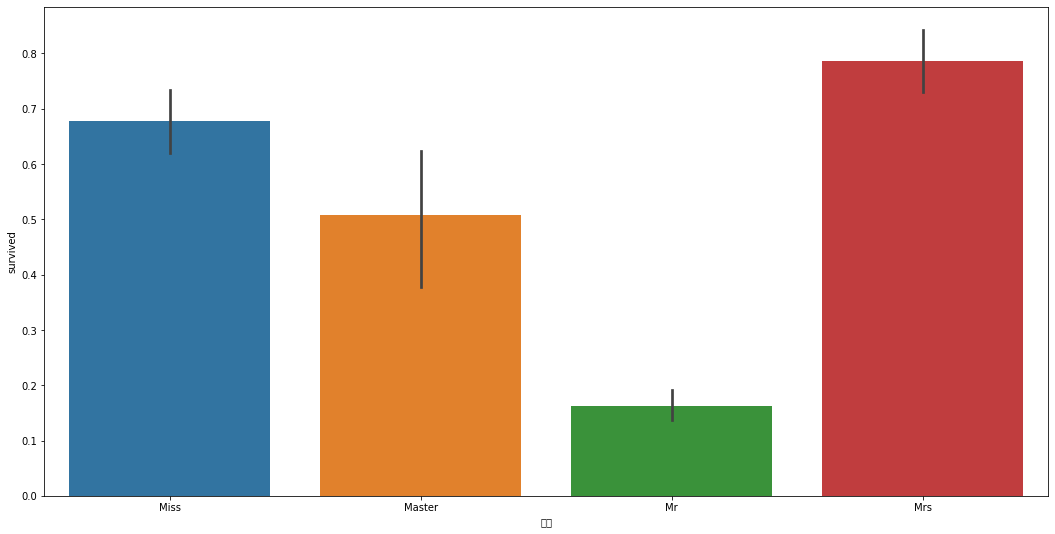

In [22]:
plt.figure(figsize=(18, 9)) # 그래프를 통해 각 호칭별 생존인원의 수를 확인해보자.

sns.barplot('호칭', 'survived', data=df_2[(df_2['호칭'] == 'Mr') | (df_2['호칭'] == 'Miss') | (df_2['호칭'] == 'Mrs') | (df_2['호칭'] == 'Master')])

plt.show()

> - 그래프를 그리기 전에도 예상해볼 수 있듯이 Miss, Mrs의 경우 여성에게 부여되는 호칭이므로 생존인원수가 Master, Mr보다 높게 나오는것을 확인 할 수 있다.
> - Miss, Mrs, Mr는 여성과 남성에게 부여되는 칭호가 맞는데 Master의 경우 어떤 사람에게 부여되는지 데이터를 직접 보고 파악해보자.

In [24]:
master_cond = df_2['호칭'] == 'Master'

mr_cond = df_2['호칭'] == 'Mr'

age_1_cond = df_2['age'] <= 14.5

female_cond = df_2['sex'] == 'female'

print(f'Master 나이 최대값: {df_2[master_cond]["age"].max()}') ## 우선 master라는 칭호의 나이를 보았을때 최대값이 14.5 인것을 확인할 수 있다.
print('')
print(df_2[(master_cond) & (female_cond)]) ## master 라는 칭호의 여성을 찾아 보앗을때 해당 조건을 만족하는 사람이 한명도 없음을 알 수 있다.
print('')
df_2[(mr_cond) & (age_1_cond)] ## 혹시 몰라 14.5이하의 Mr를 찾아보았는데 5명 정도가 나온다. (전체 승객에 비해 수가 적으므로 해당을 결측치라고 생각하고 작업을 진행하자.)


Master 나이 최대값: 14.5

Empty DataFrame
Columns: [pclass, survived, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked, boat, body, home.dest, 호칭]
Index: []



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭
569,2,0,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S,NaN,NaN,"Somerset / Bernardsville, NJ",Mr
830,3,0,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY",Mr
855,3,0,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,NaN,NaN,NaN,Mr
1105,3,0,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,NaN,NaN,NaN,Mr
1236,3,1,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,13,NaN,NaN,Mr


> Miss : 미혼 여성
> Mrs : 기혼 여성
> Master : 14.5 이하의 남성 (미성년 남성)
> Mr : 성인남성

결과 : 해당 결과를 위의 그래프에 적용한다면 타이타닉호의 생존률 
> - 성인 남성 < 미성년 남성 < 미혼 여성 < 기혼 여성 이라는 결과를 얻을 수 있다.

In [25]:
df_2[(df_2['호칭'] == 'Master')]['survived'].mean()

## 15세 이하의 남성 생존률

0.5081967213114754

In [26]:
df_2[(df_2['sex'] == 'female') & (df_2['age'] < 15)]['survived'].mean()

## 15세 이하의 여성 생존률

0.6274509803921569

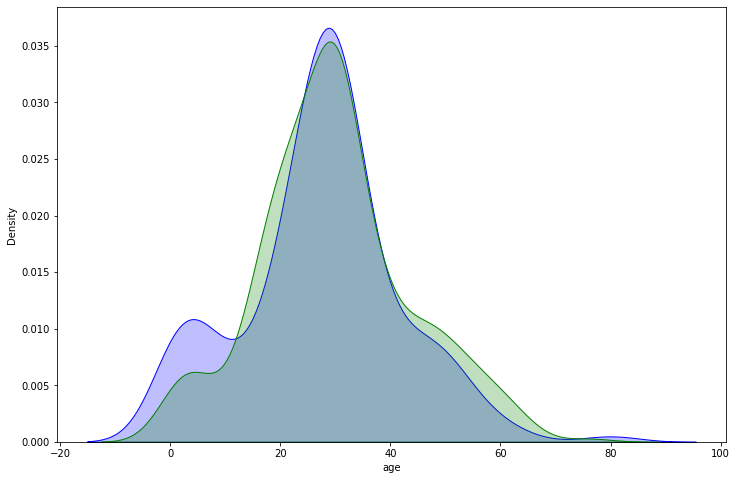

In [27]:
plt.figure(figsize=(12, 8))

sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull()) & (df['sex'] == 'male')], 
                color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull()) & (df['sex'] == 'female')], 
                color="Green", shade = True)

plt.show()


## 가족단위의 분류

> 탑승인원들을 가족단위로 묶을 수 있는 요소들을 파악해보고 해당 요소를 활용하여 가족단위로 분류해보자

In [29]:
df_2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


> - 성씨를 통한 분류
> - home 을 통한 분류
> - ticket 번호를 통한 분류

세가지 방법을 이용하여 가족단위로 분류하여 데이터를 살펴보자.

#### home.dest column을 home 과 dest로 나누어보자.

In [30]:
def sp(x):
    try:
        return x.split('/')
    except:
        return None

def sp_com(x):
    try:
        return x.split(',')
    except:
        return None

def last_nm(x):
    try:
        return x[0]
    except:
        return None
df_2['home.dest_2'] = df_2['home.dest'].map(sp)


## home.dest column의 경우 어떤것을 하나의 경로만 나와있고 어떤것은 home과 dest가 함께 포함 되어 있기 때문에
## 두개인경우 분리해서 새로운 column인 home.dest_2에 넣어보자

In [31]:
df_2['last_name'] = df_2['name'].map(sp_com).map(last_nm)

## 이름에 가장 첫째단에 나와있는 성씨를 분리해서 last_name column에 추가해보자

In [32]:
df_2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭,home.dest_2,last_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,"[St Louis, MO]",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,"[Montreal, PQ , Chesterville, ON]",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,"[Montreal, PQ , Chesterville, ON]",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,"[Montreal, PQ , Chesterville, ON]",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,"[Montreal, PQ , Chesterville, ON]",Allison


In [33]:
pd.options.display.max_columns = 200
pd.options.display.max_info_columns =200

1            Montreal, PQ 
2            Montreal, PQ 
3            Montreal, PQ 
4            Montreal, PQ 
29      Stockholm, Sweden 
               ...        
588              Cornwall 
589              Cornwall 
594     Guernsey, England 
598       Yoevil, England 
1281     Antwerp, Belgium 
Name: home.dest_2, Length: 171, dtype: object
1         Chesterville, ON
2         Chesterville, ON
3         Chesterville, ON
4         Chesterville, ON
29          Washington, DC
               ...        
588              Akron, OH
589              Akron, OH
594           Edgewood, RI
598      Cottage Grove, OR
1281           Stanton, OH
Name: home.dest_2, Length: 171, dtype: object


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


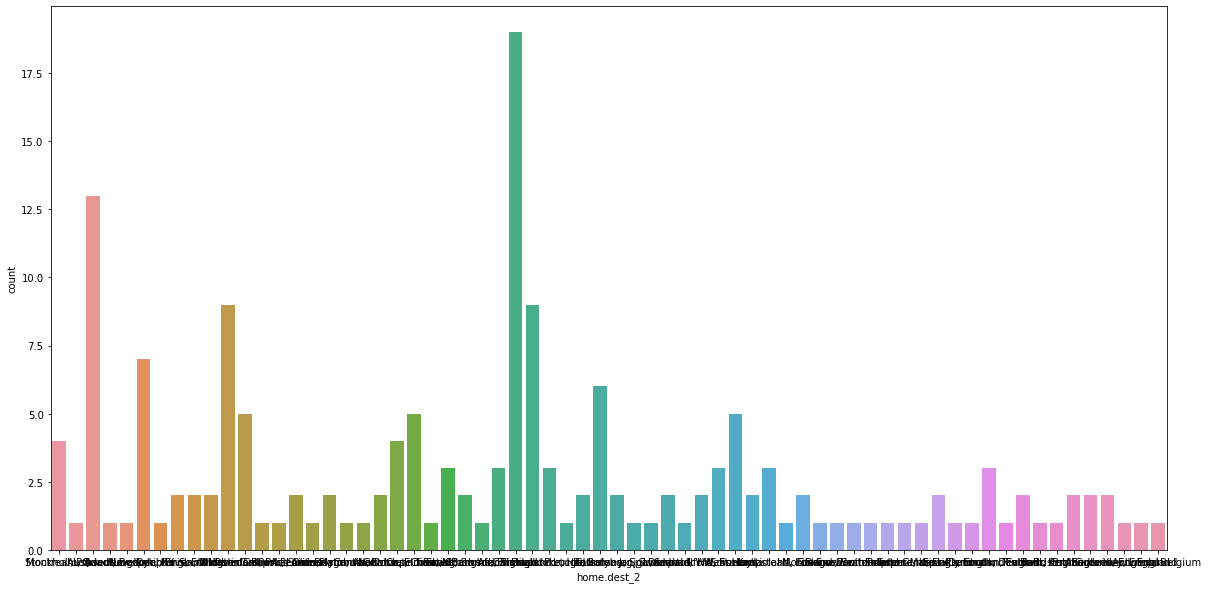

In [34]:
def length(x):
    try:
        return len(x) > 1
    except:
        return False

def sel_home(x):
    return x[0]

def sel_dest(x):
    return x[1]

print(df_2[df_2['home.dest_2'].map(length)]['home.dest_2'].map(sel_home))
print(df_2[df_2['home.dest_2'].map(length)]['home.dest_2'].map(sel_dest))
## home.dest_2 column 에서 home 과 dest만 따로 뽑아낼 수 있다.

plt.figure(figsize=(20,10))
sns.countplot(df_2[df_2['home.dest_2'].map(length)]['home.dest_2'].map(sel_home))


In [35]:
df_2['home'] = df_2[df_2['home.dest_2'].map(length)]['home.dest_2'].map(sel_home)

## home에 해당하는 정보만 따로 뽑아서 새로운 column인 home에 추가해보자.



In [36]:
df_2.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭,home.dest_2,last_name,home
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,"[St Louis, MO]",Allen,NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,"[Montreal, PQ , Chesterville, ON]",Allison,"Montreal, PQ"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,"[Montreal, PQ , Chesterville, ON]",Allison,"Montreal, PQ"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,"[Montreal, PQ , Chesterville, ON]",Allison,"Montreal, PQ"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,"[Montreal, PQ , Chesterville, ON]",Allison,"Montreal, PQ"


In [38]:
df_2['home'].isnull().value_counts()

True     1138
False     171
Name: home, dtype: int64

> - home에 대한 data를 분석한 결과 전체적으로 결측값이 너무 많아서 home 보다는 ticket 번호와 성씨가 동일한 사람을 기준으로 가족을 분류해보자.

In [40]:
same_last_name = df_2['last_name'].value_counts()


same_last_name[same_last_name >= 2] 

# same_last_name이 2이상이면 동일한 성을 가진 성씨들을 다음과 같이 나타낼 수 있다.

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Franklin      2
Yasbeck       2
Cardeza       2
Stanley       2
Holverson     2
Name: last_name, Length: 238, dtype: int64

In [42]:
last_nm_lst = same_last_name[same_last_name >= 2].index

In [43]:
last_nm_lst # 중복되는 성씨를 list 형태로 저장.

Index(['Andersson', 'Sage', 'Goodwin', 'Asplund', 'Davies', 'Rice', 'Ford',
       'Fortune', 'Smith', 'Johnson',
       ...
       'Frolicher-Stehli', 'Futrelle', 'Astor', 'Greenfield', 'Kimball',
       'Franklin', 'Yasbeck', 'Cardeza', 'Stanley', 'Holverson'],
      dtype='object', length=238)

In [44]:
tickets = []
for nm in last_nm_lst:
    tickets.append(df_2[df_2['last_name'] == nm]['ticket'].value_counts().idxmax())

# 동일한 성씨를 가진사람들의 ticket번호를 count하여 중복되는 숫자가 많은경우 그 해당 숫자의 index값(즉, 티켓번호)를 tickets라는 list에 append
## 이렇게 되면 last_nm_lst와 tickets에 성씨 - 중복티켓번호가 순서에 맞게 부여된다.


In [45]:
tickets # 중복되는 성씨에 해당하는 ticket 번호를 list에 저장.

['347082',
 'CA. 2343',
 'CA 2144',
 '347077',
 'C.A. 33112',
 '382652',
 'W./C. 6608',
 '19950',
 '13695',
 '347742',
 '113760',
 '347088',
 '3101295',
 '29750',
 '223596',
 'PC 17597',
 '2625',
 '4133',
 'PC 17608',
 '349909',
 'PC 17572',
 'C.A. 34651',
 'CA 31352',
 '113781',
 '36973',
 '350052',
 'W./C. 6607',
 '350026',
 '230136',
 '2666',
 '345764',
 'SC/Paris 2123',
 '7534',
 'C.A. 2315',
 'C 17368',
 '363291',
 '2678',
 '2674',
 '315087',
 '29105',
 'F.C.C. 13529',
 '220845',
 '12749',
 'PC 17611',
 'S.O.C. 14879',
 '315153',
 '248738',
 '28220',
 '26360',
 'S.O./P.P. 2',
 '19928',
 '28133',
 'PC 17474',
 '347060',
 '29106',
 '350405',
 'SC/AH 29037',
 'PC 17604',
 'S.C./PARIS 2079',
 '2662',
 'PP 9549',
 '347066',
 '226593',
 '2661',
 '371110',
 '24065',
 '2653',
 '19943',
 'C.A. 31921',
 '367230',
 'PC 17582',
 '2668',
 '367226',
 '230080',
 '350050',
 '350053',
 '364849',
 '4136',
 '695',
 '113503',
 '36928',
 '35281',
 '110813',
 '350407',
 '315085',
 'C.A. 2673',
 '17421'

In [51]:
family_lst = []
family_dict = {}
for idx in range(len(tickets)):
    df_2[((df_2['last_name'] == last_nm_lst[idx]) & (df_2['ticket'] == tickets[idx]))]
    nm = last_nm_lst[idx]
    num = len(df_2[(df_2['last_name'] == last_nm_lst[idx]) & (df_2['ticket'] == tickets[idx])]['last_name'])
    family_dict[nm] = num

## 위에서 만든 2가지 리스트를 활용하여 성씨와 해당성씨에 해당하는 가족수를 알아낼 수 있다.

In [52]:
family_dict # 성씨와 티켓번호가 각각의 경우에 해당할때 반복문을 통해 '성씨': '가족수'의 형태로 새로운 dict에 저장. 

{'Abbott': 3,
 'Abelseth': 1,
 'Abelson': 2,
 'Aks': 2,
 'Ali': 1,
 'Allen': 1,
 'Allison': 4,
 'Andersson': 7,
 'Andrew': 1,
 'Andrews': 1,
 'Angle': 2,
 'Arnold-Franchi': 2,
 'Asplund': 7,
 'Astor': 2,
 'Attalah': 1,
 'Backstrom': 2,
 'Baclini': 4,
 'Barbara': 2,
 'Baxter': 2,
 'Beane': 2,
 'Becker': 4,
 'Beckwith': 2,
 'Betros': 1,
 'Bishop': 2,
 'Bonnell': 1,
 'Boulos': 3,
 'Bourke': 2,
 'Bowen': 1,
 'Bradley': 1,
 'Braund': 1,
 'Brown': 3,
 'Bryhl': 2,
 'Buckley': 1,
 'Burns': 1,
 'Cacic': 1,
 'Caldwell': 3,
 'Calic': 1,
 'Canavan': 1,
 'Caram': 2,
 'Cardeza': 2,
 'Carlsson': 1,
 'Carr': 1,
 'Carrau': 2,
 'Carter': 4,
 'Cavendish': 2,
 'Chaffee': 2,
 'Chambers': 2,
 'Chapman': 2,
 'Christy': 2,
 'Chronopoulos': 2,
 'Clark': 2,
 'Clarke': 2,
 'Coleff': 1,
 'Collyer': 3,
 'Compton': 3,
 'Connolly': 1,
 'Cook': 1,
 'Cor': 1,
 'Coutts': 3,
 'Cribb': 2,
 'Crosby': 2,
 'Cumings': 2,
 'Daly': 1,
 'Danbom': 3,
 'Davidson': 2,
 'Davies': 2,
 'Davison': 2,
 'Dean': 4,
 'Dennis': 1,
 'Dick':

> 결과값이 제대로 나왔는지 확인하기 위해 몇가지 성씨를 살펴보자.

In [53]:
family_dict['Sage'] ## 만들어진 dictionary를 이용해 원하는 성씨의 가족이 몇명인지 바로 확인이 가능하다.

11

In [54]:
family_dict['Andersson']

7

In [49]:
df_2[df_2['last_name'] == 'Sage']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭,home.dest_2,last_name,home
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Master,None,Sage,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,Master,None,Sage,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN


dict_values([7, 11, 8, 7, 2, 6, 5, 6, 2, 3, 4, 6, 6, 3, 1, 2, 2, 5, 5, 5, 2, 4, 2, 4, 2, 1, 4, 2, 4, 4, 2, 4, 1, 4, 1, 3, 3, 1, 1, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 1, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 1, 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2])

In [105]:
family_df = pd.DataFrame(data=family_dict.values(), index=family_dict.keys(), columns=['num_fam'])
family_df

,num_fam
Andersson,7
Sage,11
Goodwin,8
Asplund,7
Davies,2
...,...
Franklin,1
Yasbeck,2
Cardeza,2
Stanley,1


In [106]:
family_df.value_counts()

num_fam
2          112
1           67
3           38
4            9
5            4
6            4
7            2
8            1
11           1
dtype: int64

In [116]:
family_df[family_df['num_fam'] > 1]

,num_fam
Andersson,7
Sage,11
Goodwin,8
Asplund,7
Davies,2
...,...
Greenfield,2
Kimball,2
Yasbeck,2
Cardeza,2


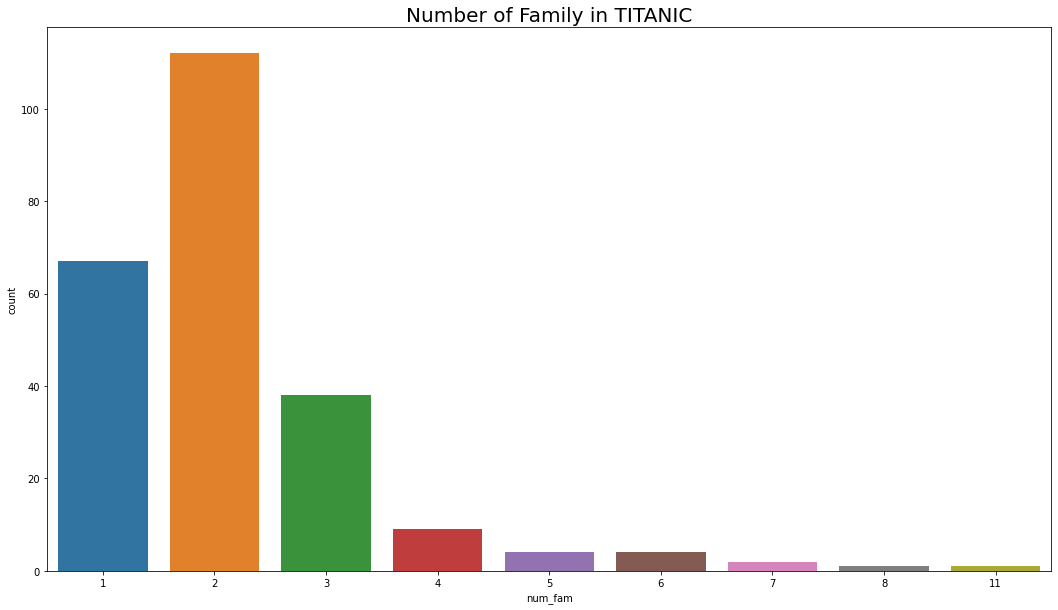

In [112]:
plt.figure(figsize=(18,10))
plt.title('Number of Family in TITANIC', size=20)
sns.countplot(data=family_df, x='num_fam')

plt.show()

> 가족수가 1인경우 티켓값이나 home으로도 가족임을 확인할 수 없는경우 이므로 해당 자료는 결측치에 해당한다. 따라서 그것을 제외한다면 타이타닉에 탑승한 가족은 2인가족이 월등히 많으며 최대 11인 가족까지 존재하는 것을 확인할 수 있다.

> - 결측치를 제외하고 관측해보자.

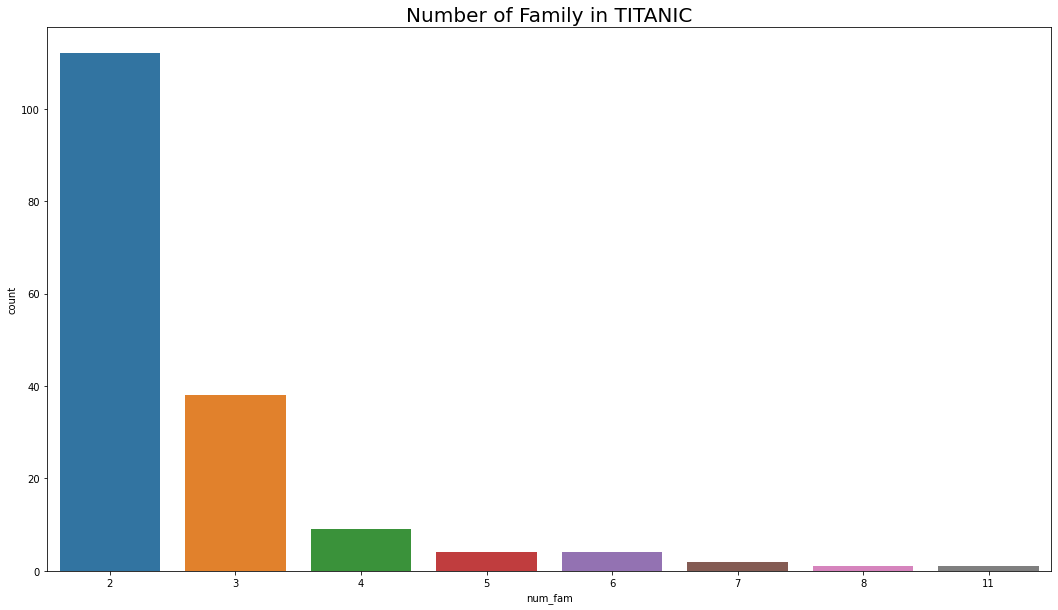

In [117]:
plt.figure(figsize=(18,10))
plt.title('Number of Family in TITANIC', size=20)
sns.countplot(data=family_df[family_df['num_fam'] > 1], x='num_fam')

plt.show()

결론 : 티켓번호와 성씨가 동일하면 가족임이 확실히 확인 되지만 중간중간 가족임에 불구하고 티켓번호가 다른 경우가 조금 발생하고 (위의 딕셔너리에서 가족수가 1인경우) 그러한 가족을 특정할 요소가 존재하지 않음을 확인했다.

#### 추가적으로 타이타닉에 승선한 가장 대가족은 11인 가족이며 3등석에 탑승하여 모두 사망한것을 확인할 수 있다.

In [119]:
df_2[df_2['last_name'] == 'Sage']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭,home.dest_2,last_name,home
1170,3,0,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Master,None,Sage,NaN
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN,67.0,NaN,Master,None,Sage,NaN
1172,3,0,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1173,3,0,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Miss,None,Sage,NaN
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN,NaN,NaN,Mr,None,Sage,NaN


In [118]:
def jack(x):
    return 'Jack' in x

df_2[df_2['name'].map(jack)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,호칭,home.dest_2,last_name,home
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN,NaN,"Philadelphia, PA",Dr,"[Philadelphia, PA]",Brewe,NaN


## 여담 : jack 이란 이름의 주인공은 찾지 못했다

##전체 결론
> - 성별, 나이와 생존률과의 상관관계를 파악하였습니다.
> - 성별의 경우 남성보다 여성의 생존률이 높게 관측되었으며 나이는 중간층보다 어리거나 노인의 생존률이 더 높게 관측되었습니다.
> - 또한 주어진 데이터를 다양한 관점에서 관측하고 분류 해 보았습니다.
> - 이름에 포함된 호칭으로 데이터를 분류한 결과 master라는 칭호가 가지는 의미를 찾아낼 수 있었습니다.
> - 호칭이 나이, 성별에따라 부여됨을 확인하였고 그것과 마찬가지로 호칭도 생존률과의 상관관계가 있어 해당내용을 그래프를 통해 표현하였습니다.
> - 추가적으로 이름의 성, home, ticket번호를 조합하여 가족단위로 데이터를 분류하였습니다.
> - 해당 과정에서 home의 경우 결측치가 너무 많아 분석요소로 쓰기 힘들었고 나머지인 ticket번호와 성씨를 통해 타이타닉 승객들을 가족단위로 분류하는데 성공하였습니다.